In [1]:
import matplotlib.pyplot as plt
import numpy as np
# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

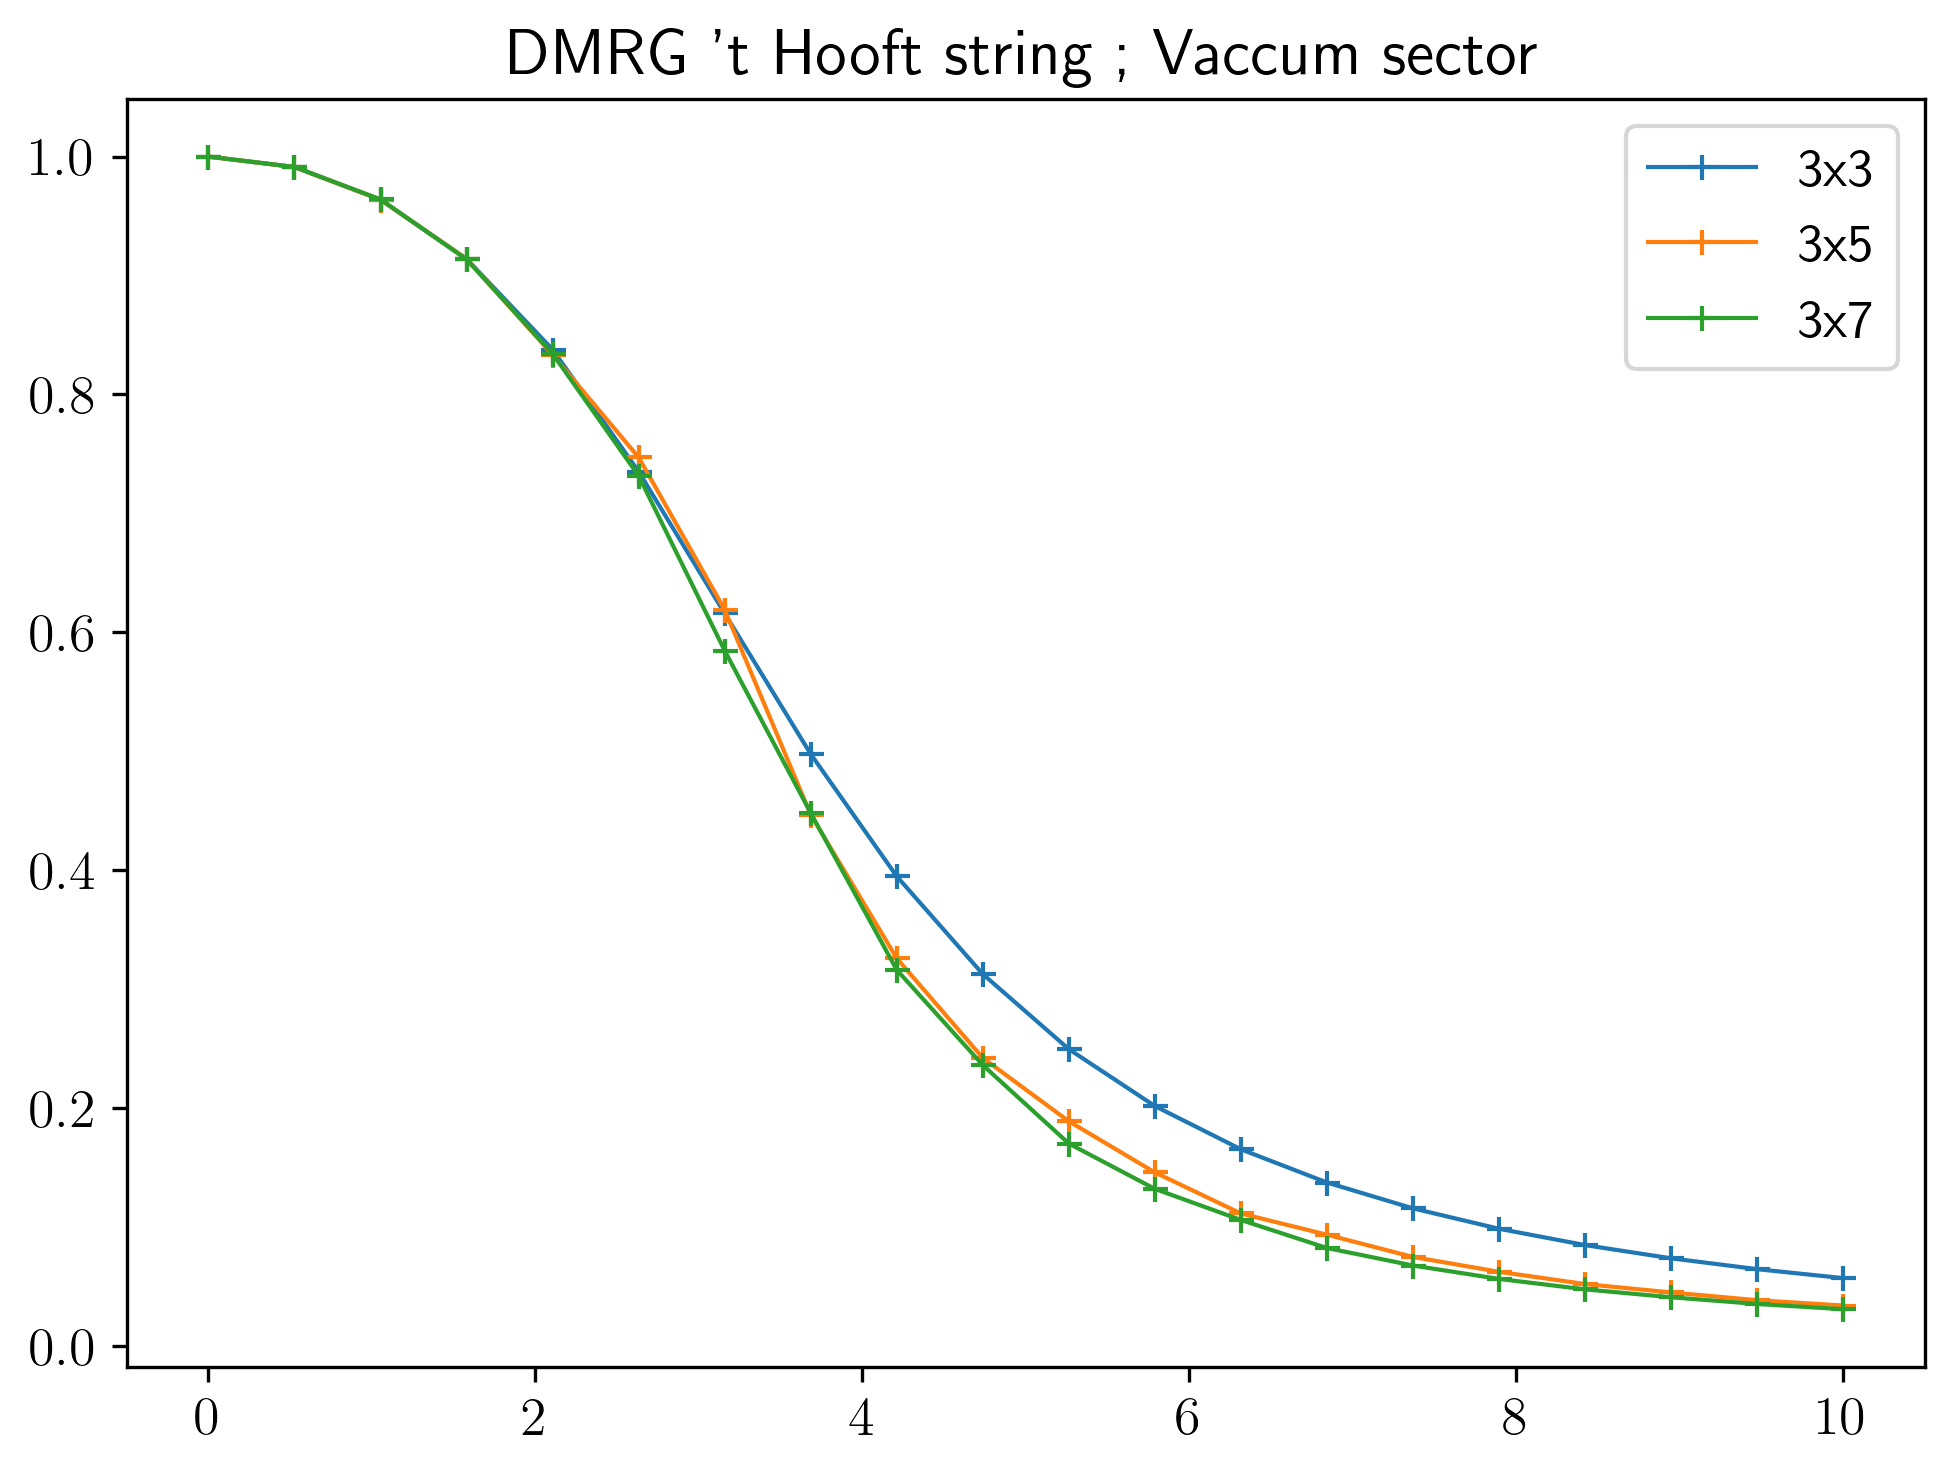

In [2]:
Ls = [3,5,7]
chis = [8,16,32]
ss = [1,2,3]
plt.title("DMRG 't Hooft string ; Vaccum sector")
hs = np.linspace(0,10,20)
for L, chi, s in zip(Ls, chis, ss):
    string = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_{s}-1_horizontal_Z2_dual_direct_lattice_3x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    plt.plot(hs, string, '+-', linewidth=1, label=f"3x{L}")

plt.legend()
plt.show()

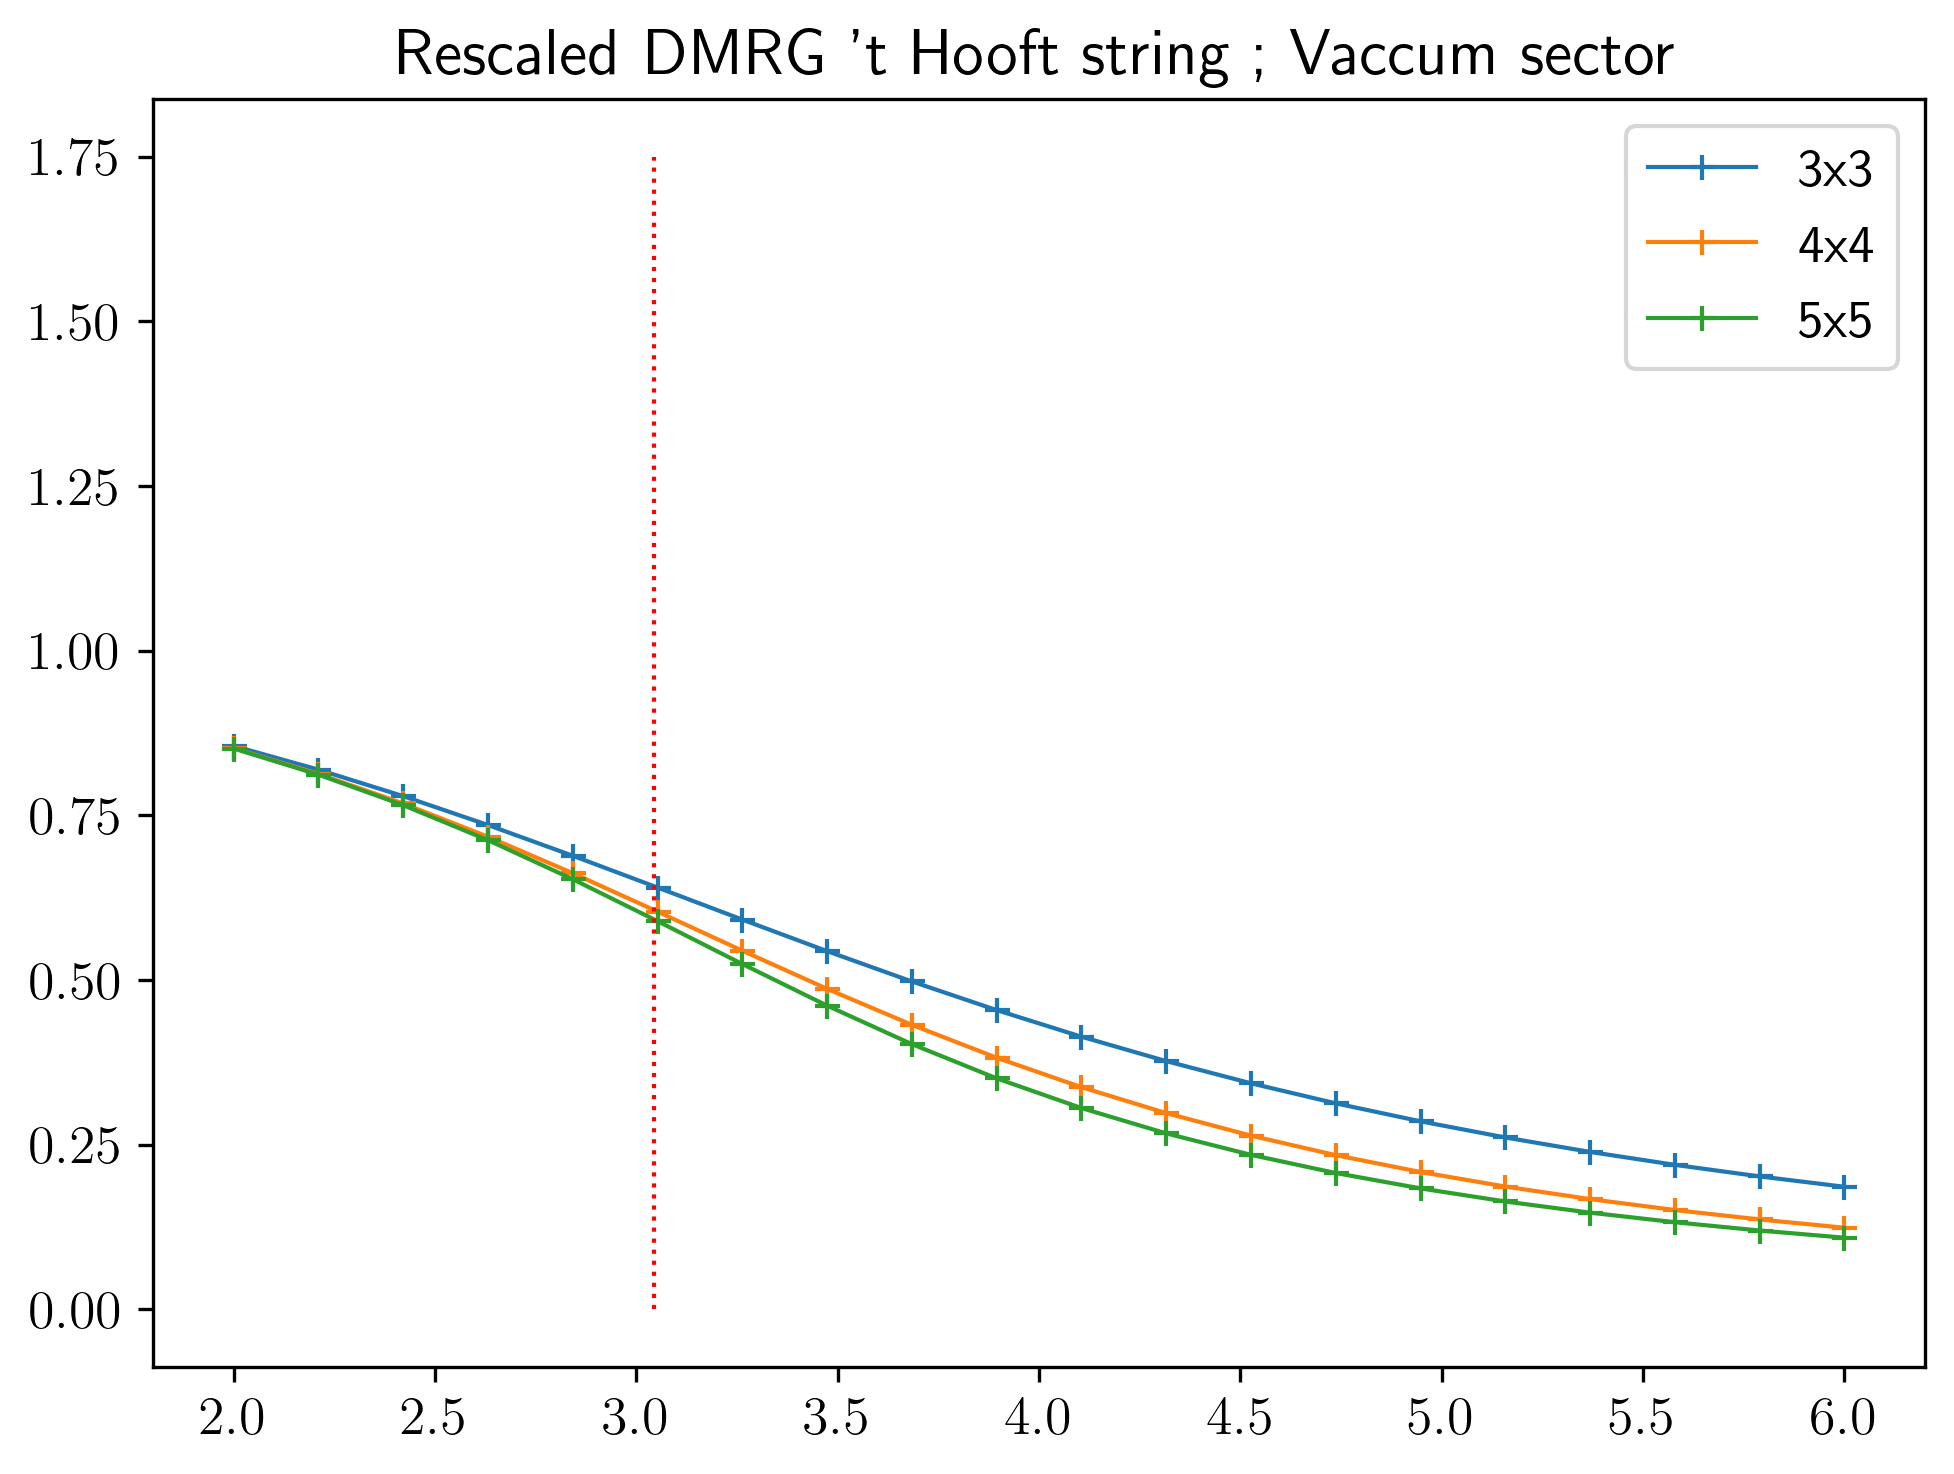

In [16]:
Ls = [3, 4, 5]
chis = [8,64,128]
ss = [1,1,1]
plt.title("Rescaled DMRG 't Hooft string ; Vaccum sector")
hs = np.linspace(2,6,20)
for L, chi, s in zip(Ls, chis, ss):
    string = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_first_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_20_chi_{chi}.npy")
    string2 = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_second_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_20_chi_{chi}.npy")
    plt.plot(hs, string, '+-', linewidth=1, label=f"{L}x{L}") # (L**(-0.326419/0.629971))*
    # plt.plot(hs, (L**(4))*np.abs(string2 - string**2), '+-', linewidth=1, label=f"{L}x{L}")

# L = 6
# chi = 256
# s = 1
# string = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_first_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_50_chi_{chi}.npy")
# hs = np.linspace(2,6,50)

# plt.plot(hs, np.sqrt(string2), '+-', linewidth=1, label=f"{L}x{L}") # (L**(-0.326419/0.629971))*
plt.vlines(x=3.044, ymin=0, ymax=1.75, linestyles=':', colors='r', linewidth=1)
plt.legend()
plt.show()

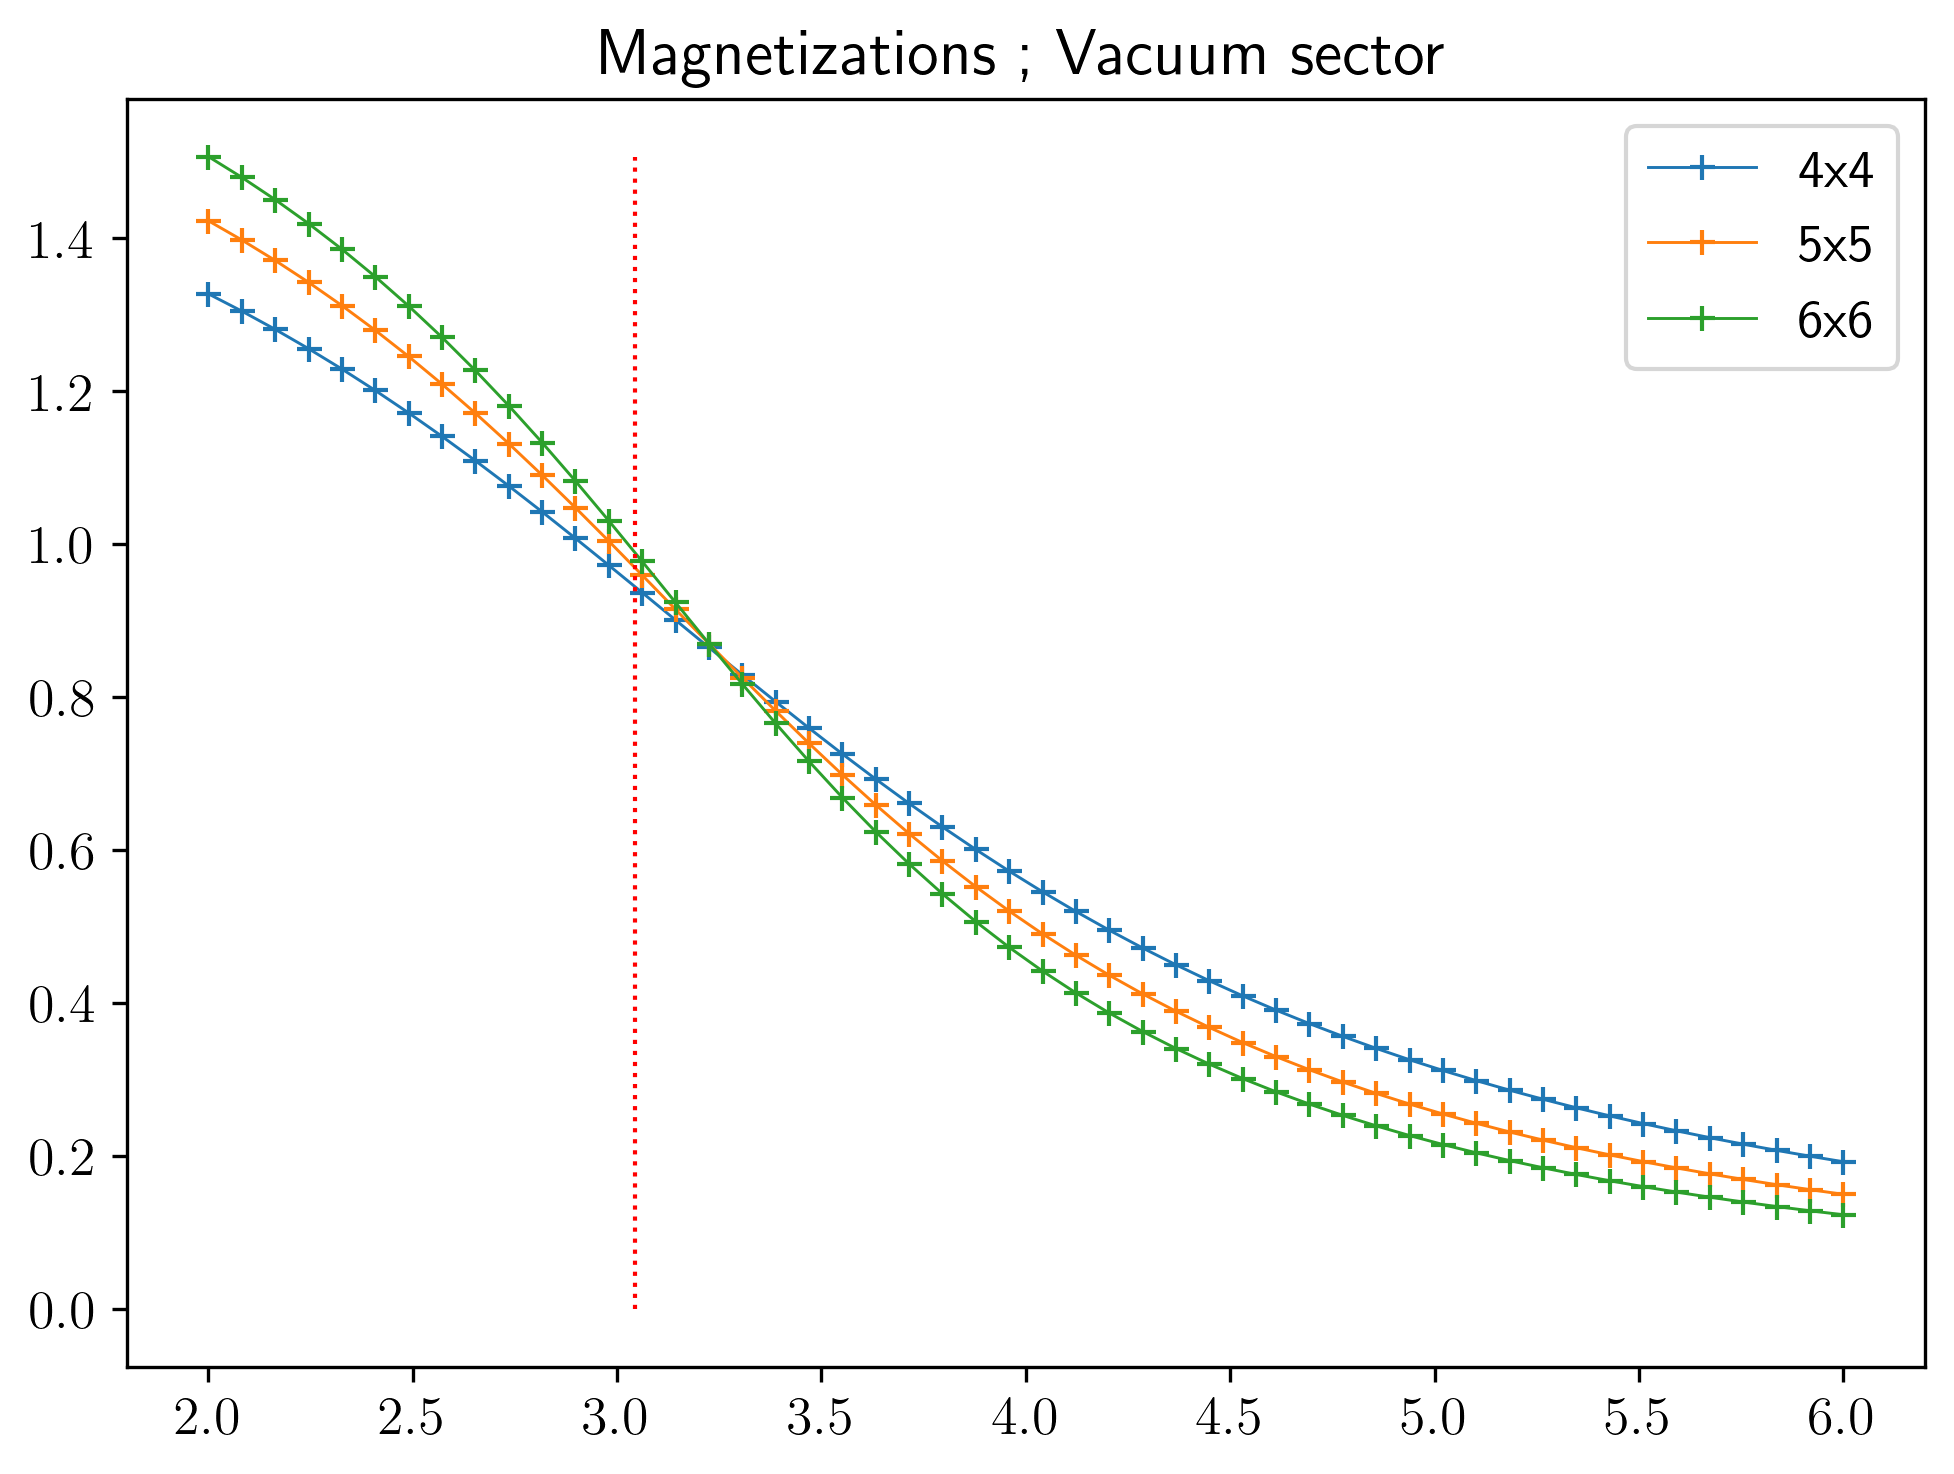

In [16]:
Ls = [4, 5, 6]
chis = [64,128, 256]
plt.title("Magnetizations ; Vacuum sector")
hs = np.linspace(2,6,50)
for L, chi in zip(Ls, chis):
    string = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/mag_data/dual_mag_first_moment_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_50_chi_{chi}.npy")
    string2 = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/mag_data/dual_mag_second_moment_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_50_chi_{chi}.npy")
    plt.plot(hs, (L**(0.32))*string, '+-', linewidth=0.7, label=f"{L}x{L}") # (L**(-0.326419/0.629971))*
    # plt.plot(hs, np.abs(string2 - string**2), '+-', linewidth=1, label=f"{L}x{L}")

# L = 6
# chi = 256
# s = 1
# string = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_first_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_50_chi_{chi}.npy")
# hs = np.linspace(2,6,50)

# plt.plot(hs, np.sqrt(string2), '+-', linewidth=1, label=f"{L}x{L}") # (L**(-0.326419/0.629971))*
plt.vlines(x=3.044, ymin=0, ymax=max((L**(0.32))*string), linestyles=':', colors='r', linewidth=1)
plt.legend()
plt.show()

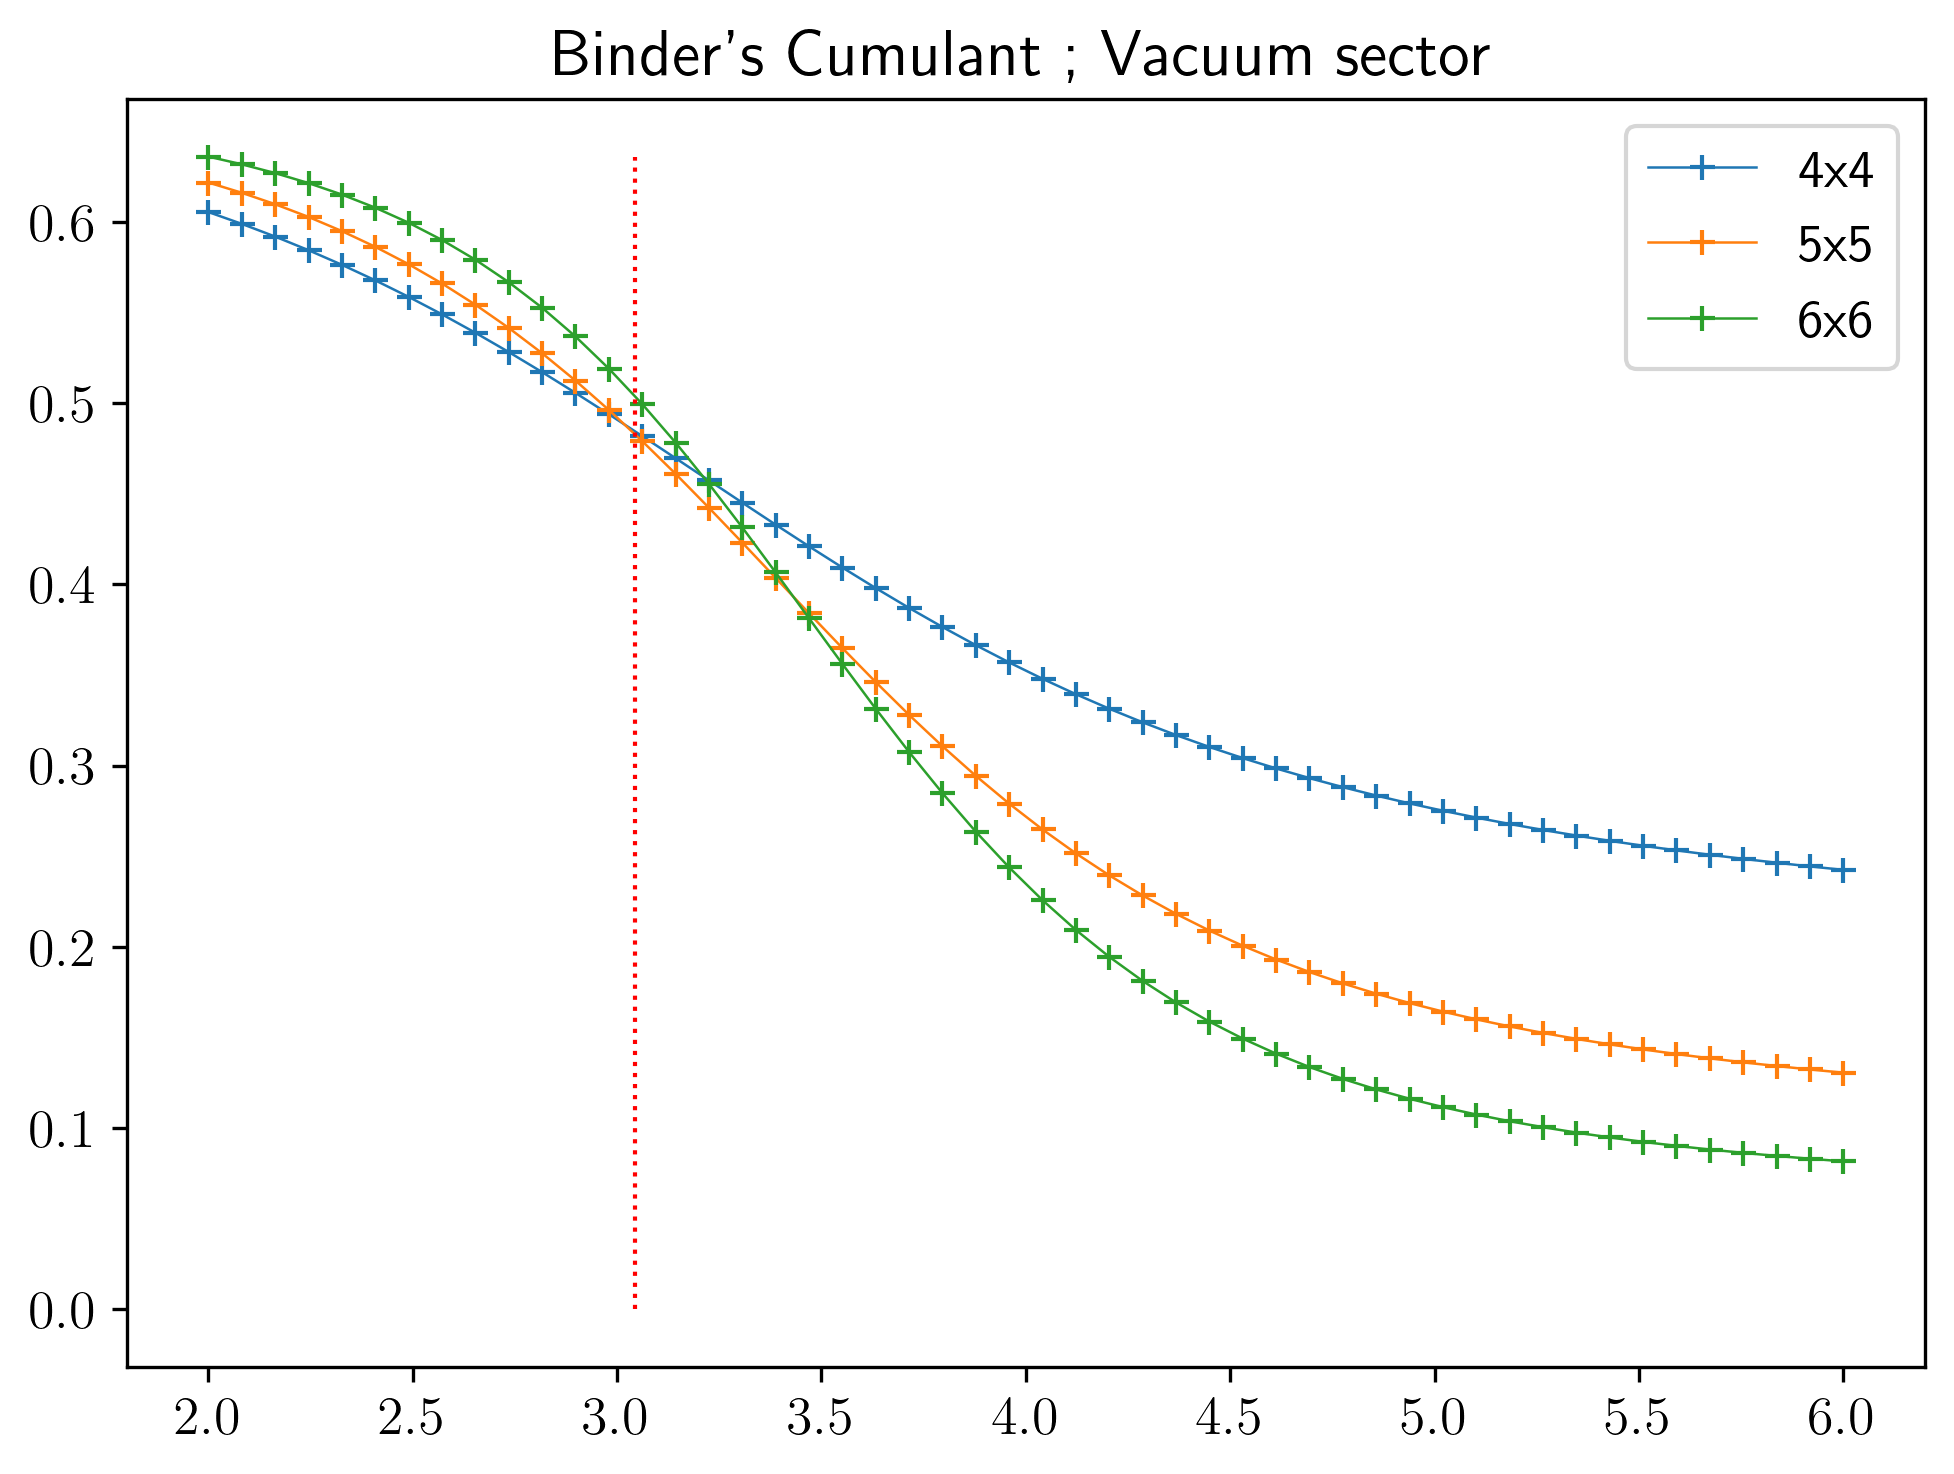

In [14]:
from qs_mps.utils import  binders_cumul
Ls = [4,5,6]
chis = [64,128,256]
plt.title("Binder's Cumulant ; Vacuum sector")
h_i = 2
h_f = 6
npoints = 50
path_drive = "/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results"
hs = np.linspace(h_i, h_f, npoints)
for L, chi in zip(Ls, chis):
    string4 = np.load(f"{path_drive}/mag_data/dual_mag_fourth_moment_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_{npoints}_chi_{chi}.npy")
    string2 = np.load(f"{path_drive}/mag_data/dual_mag_second_moment_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_{npoints}_chi_{chi}.npy")
    ub = binders_cumul(fourth_m=string4, sm=string2)
    np.save(f"{path_drive}/critical_exponents/binders_cumulant_dual_mag_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy", ub)
    plt.plot(hs, ub, '+-', linewidth=0.6, label=f"{L}x{L}")
    # plt.plot(hs, string2, '+-', linewidth=1, label=f"{L}x{L}")
# L = 6
# chi = 128
# string4 = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_fourth_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_50_chi_{chi}.npy")
# string2 = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_second_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_50_chi_{chi}.npy")
# ub = binders_cumul(fourth_m=string4, sm=string2)
# hs = np.linspace(2,6,50)
# plt.plot(hs, ub, '+-', linewidth=0.6, label=f"{L}x{L}")
plt.vlines(x=3.044, ymin=0, ymax=max(ub), linestyles=':', colors='r', linewidth=1)
plt.legend()
plt.show()

In [4]:
Ls = [4,5]
chis = [64,128]
h_i = 2
h_f = 6
npoints = 50
path_drive = "/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results"
hs = np.linspace(h_i, h_f, npoints)
max_reps = 10
acc = 1e-5
Uc = []
Hc = []
for L, chi in zip(Ls, chis):
    Uc.append(np.load(f"{path_drive}/critical_exponents/binders_cumulant_dual_mag_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"))

for i in range(len(Ls)-1):
    print(f"finding h_c for L1={Ls[i]}, L2={Ls[i+1]}")
    for idx, h in enumerate(hs):
        if Uc[i][idx] > Uc[i+1][idx]:
            print("hc interval found!")
            break
    h_plus = h
    h_minus = hs[idx-1]
    hc = 0

    for rep in range(max_reps):
        h_mean = np.mean([h_minus,h_plus])
        u1 = np.interp(h_mean, hs[idx-2:idx+1], Uc[i][idx-2:idx+1])
        u2 = np.interp(h_mean, hs[idx-2:idx+1], Uc[i+1][idx-2:idx+1])
        if u1 < u2:
            h_minus = h_mean
        if u1 > u2:
            h_plus = h_mean
        
        if abs(u1-u2) < acc:
            hc = h_mean
            print(f"we found a h_c: {hc} with accuracy: {acc} after {rep} repetitions")
            break
        if rep == (max_reps-1) and (hc == 0):
            hc = h_mean
            print(f"we found a h_c: {hc} with accuracy: {abs(u1-u2)} after {rep} repetitions - increase reps or reduce accuracy")
    Hc.append(hc)

hc_mean = np.mean(Hc)
print(f"we found a h_c among all the Ls equal to: {hc_mean}")


finding h_c for L1=4, L2=5
hc interval found!
we found a h_c: 3.017538265306122 with accuracy: 1e-05 after 7 repetitions
we found a h_c among all the Ls equal to: 3.017538265306122


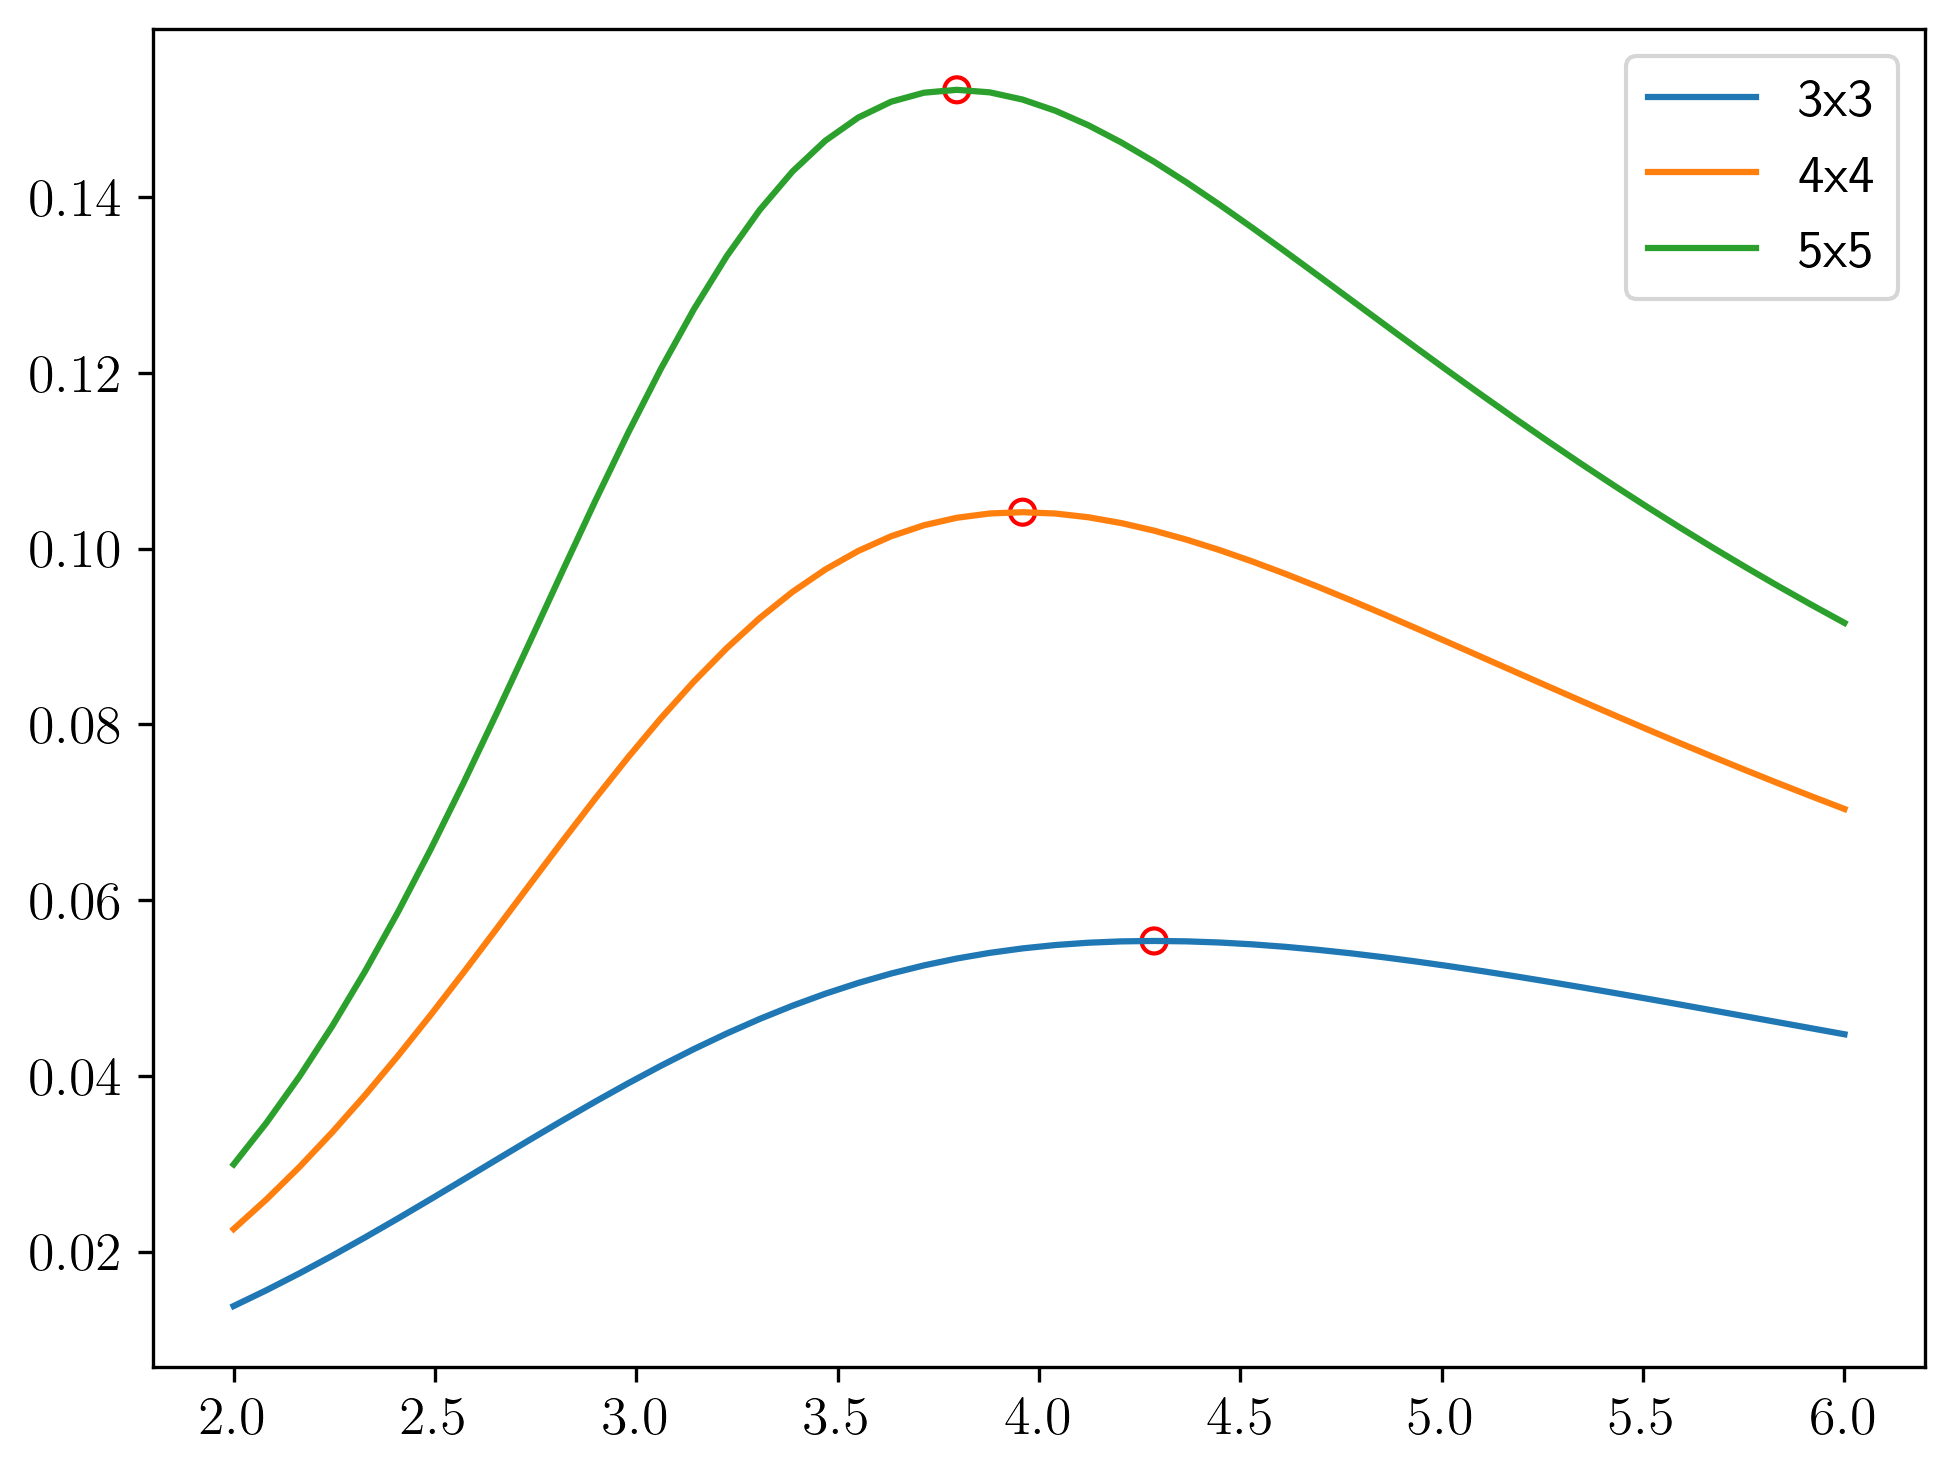

In [5]:
from qs_mps.utils import load_list_of_lists
from matplotlib.patches import Ellipse
wheres = [2,2,3]
Ls = [3,4,5]
chis = [8,64,128]
hs = np.linspace(2,6,50)
entr_max = []
h_max = []
for L, chi, where in zip(Ls, chis, wheres):
    entropy = load_list_of_lists(f"{path_drive}/entropy_data/{where}_bond_entropy_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_50_chi_{chi}")
    plt.plot(hs, entropy, label=f"{L}x{L}")
    plt.scatter(hs[np.argmax(entropy)], np.max(entropy), edgecolor='red', facecolor='none', linewidth=1)
    entr_max.append(np.max(entropy))
    h_max.append(hs[np.argmax(entropy)])
plt.legend()
plt.show()

In [10]:
x = 3.044
from qs_mps.utils import curve_fit
def parabolic(x, a, b, c):
    return a/(x*b+c)

p0 = [3,-1,0]
param, cov = curve_fit(parabolic, h_max, entr_max)
print(param)

[  0.15974173   3.38576617 -11.81046729]


/Users/fradm98/opt/anaconda3/envs/mps/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


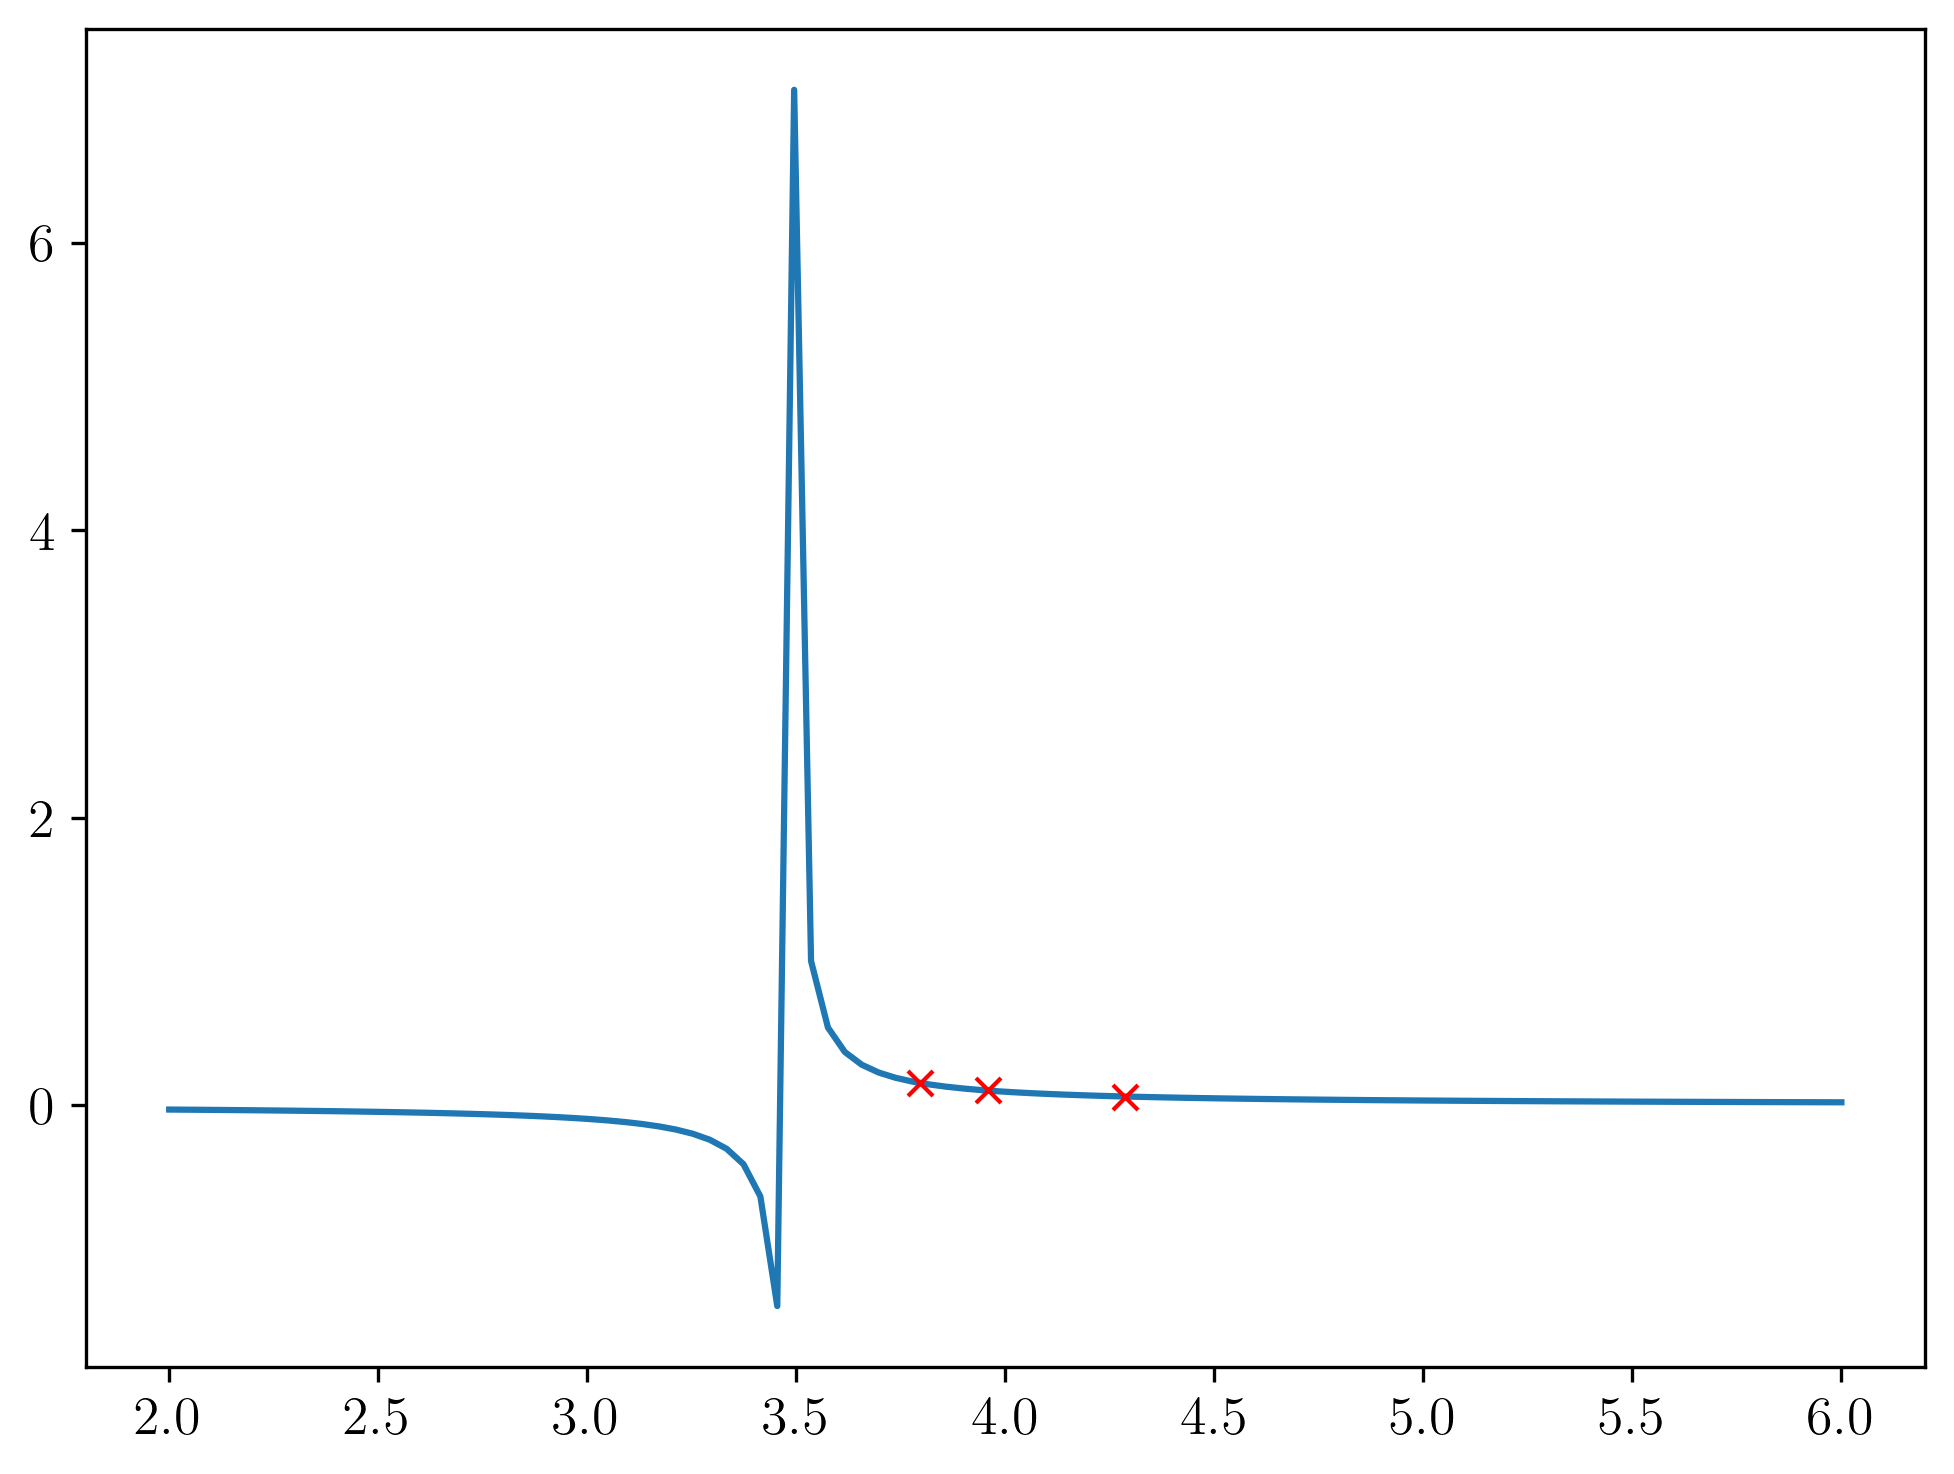

In [11]:
hs = np.linspace(2,6,100)
plt.plot(hs, parabolic(hs, a=param[0], b=param[1], c=param[2]))
plt.plot(h_max, entr_max, 'x', color='r')